# Smart Manufacturing

![Screenshot](images/throughput_time.JPG) 

Scenario: We have been given data from a spare parts manufacturing plant that uses Fabricating Machines, and skilled Operators to produce spare parts. These are small parts and they are produced in the 100's. The manufacturing plant wants to produce as many parts as possible quickly.

**Data:** We have given given 1 day's manufacturing data. There are 2 Machines (M1 and M2) and 5 human operators (O1...O5) and on this day 3 parts (P1, P2 and P3) were produced.

Both M1 and M2 have different rates of production, when they are running. However, they both require some set-up time, as well as `change over` time when switching between different parts. 

__Stoppages__ Throughout the day, these machines get stopped for various reasons. These NPT (non-productive times) are due to the following reasons:
1. Alarms (machine parts overheating, high vibrations)
2. Operator stops (humans stopping the machines, for taking a break, replacing raw etc.)
3. Change over (when switching from one Part to manufacturing another)



**Goal for this lesson**: Compare the throughputs of the different machines, compare part manufacturing difficulty and operator efficiencies, by looking at the data


![Screenshot](images/CumulativeFlow.png) 

### Preparatory Tasks

1. Read the input file
2. Format the data into a proper time series (with datetime) Timestamps and floats for the sensor values
3. Plot the number of parts produced with time as the x-axis (flat areas are stoppage times)

## Questions to be answered

- Q1: How does Machine M1 compare against M2 in terms of its production capacity?
- Q2: How do the 3 parts (P1, P2, P3) compare in terms of production complexity, based on this one day's data?
- Q3: How do the 5 operators compare, in terms of their individual production rates?
- Q4: What is the actual `realized` production rate, when taking into account all the stoppages?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
%matplotlib inline

### 1. Reading the input file

In [225]:
data = pd.read_csv("smart_manufacturing_operator_machine_data.csv",sep=",",parse_dates=True)

In [226]:
data.head()

,Time,StopType,Operator,Part,NumberOfPieces,Machine
0,0:07:29.798441,Run,Op_2,P1,12483,M2
1,0:09:55.991285,Run,Op_1,P1,18988,M1
2,0:10:46.491958,Run,Op_1,P1,1793,M1
3,0:17:12.460362,ChangeOver,Op_1,P3,0,M1
4,0:21:34.147366,OpStop,Op_2,P1,0,M2


### 2. Formatting the data into a proper time series (with datetime) Timestamps and floats for the sensor values

In [227]:
import datetime

In [228]:
data = data.iloc[0:-2,:]
data['Time'] = [datetime.datetime.strptime(data.Time[row],'%H:%M:%S.%f') for row in range(len(data.NumberOfPieces))]
data = data.rename(columns={'Time': 'DateTime'})
data['Date'] = [d.date() for d in data['DateTime']]
data['Time'] = [d.time() for d in data['DateTime']]
data.set_index(data['Time'],inplace=True)
data.drop(columns=['Time'],inplace=True)
data

,DateTime,StopType,Operator,Part,NumberOfPieces,Machine,Date
Time,,,,,,,
00:07:29.798441,1900-01-01 00:07:29.798441,Run,Op_2,P1,12483,M2,1900-01-01
00:09:55.991285,1900-01-01 00:09:55.991285,Run,Op_1,P1,18988,M1,1900-01-01
00:10:46.491958,1900-01-01 00:10:46.491958,Run,Op_1,P1,1793,M1,1900-01-01
00:17:12.460362,1900-01-01 00:17:12.460362,ChangeOver,Op_1,P3,0,M1,1900-01-01
00:21:34.147366,1900-01-01 00:21:34.147366,OpStop,Op_2,P1,0,M2,1900-01-01
00:26:35.334250,1900-01-01 00:26:35.334250,Run,Op_2,P1,8341,M2,1900-01-01
00:37:23.623745,1900-01-01 00:37:23.623745,OpStop,Op_2,P1,0,M2,1900-01-01
00:40:47.510784,1900-01-01 00:40:47.510784,OpStop,Op_1,P3,0,M1,1900-01-01
00:52:31.768323,1900-01-01 00:52:31.768323,OpStop,Op_2,P1,0,M2,1900-01-01


### 3. Ploting the number of parts produced with time as the x-axis (flat areas are stoppage times)

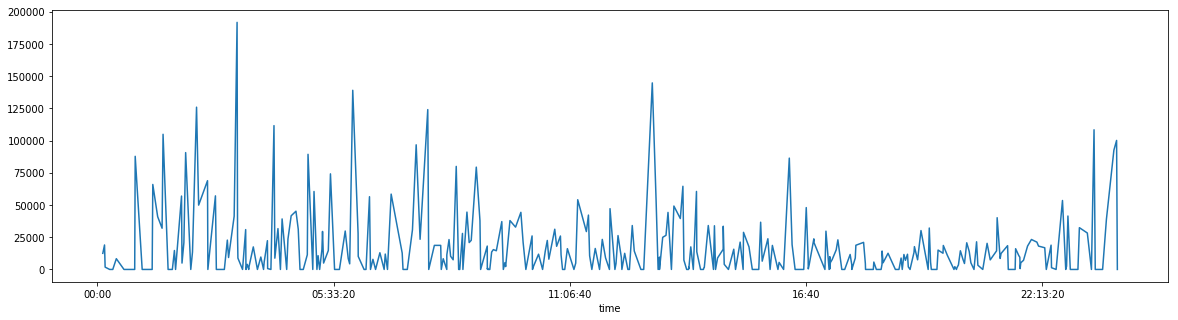

In [243]:
fig = plt.figure(figsize=(20, 5))
plt.plot(data.index, data['NumberOfPieces'])
plt.show()

## • Q1: How does Machine M1 compare against M2 in terms of its production capacity?

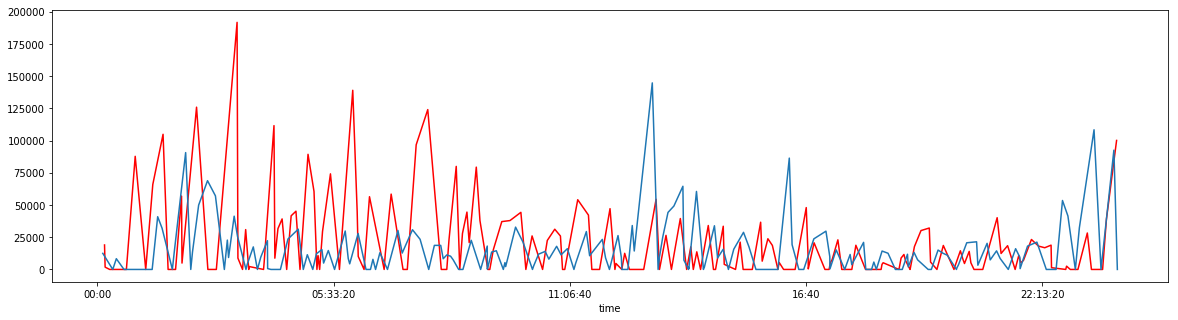

In [251]:
M1_Capacity = data.loc[data['Machine']=="M1"]
M2_Capacity = data.loc[data['Machine']=="M2"]
fig = plt.figure(figsize=(20, 5))
plt.plot(M1_Capacity.index, M1_Capacity['NumberOfPieces'], color ='red')
plt.plot(M2_Capacity.index, M2_Capacity['NumberOfPieces'])
plt.show()

Machine 1 produces most of the parts between 00:00 to 12:00 then after Machine 1 and 2 are fairly similar.

### • Q2: How do the 3 parts (P1, P2, P3) compare in terms of production complexity, based on this one day's data?

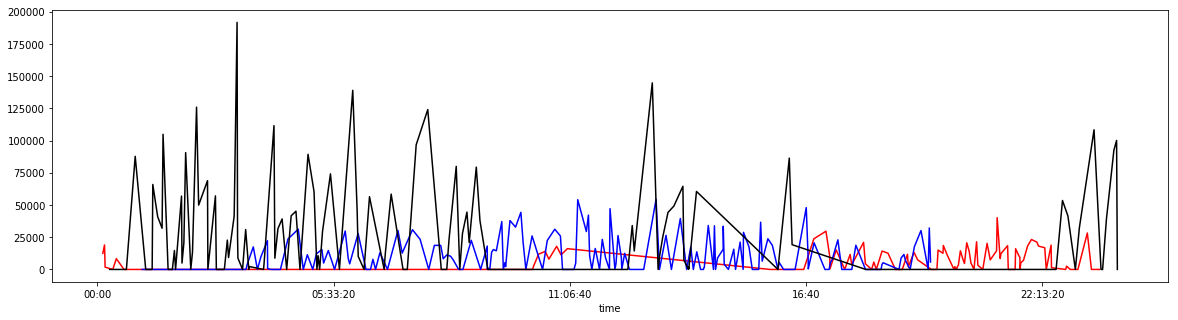

In [252]:
P1_Capacity = data.loc[data['Part']=="P1"]
P2_Capacity = data.loc[data['Part']=="P2"]
P3_Capacity = data.loc[data['Part']=="P3"]
fig = plt.figure(figsize=(20, 5))
plt.plot(P1_Capacity.index, P1_Capacity['NumberOfPieces'], color ='red')
plt.plot(P2_Capacity.index, P2_Capacity['NumberOfPieces'], color ='blue')
plt.plot(P3_Capacity.index, P3_Capacity['NumberOfPieces'], color ='black')
plt.show()

More of Part 1 is produced, the production of Part 1 varies greately. Part 2 is produced throughout most of the day and in more consistent quantities. Part 3 is produced is less quantities and inconsistently.

### • Q3: How do the 5 operators compare, in terms of their individual production rates?

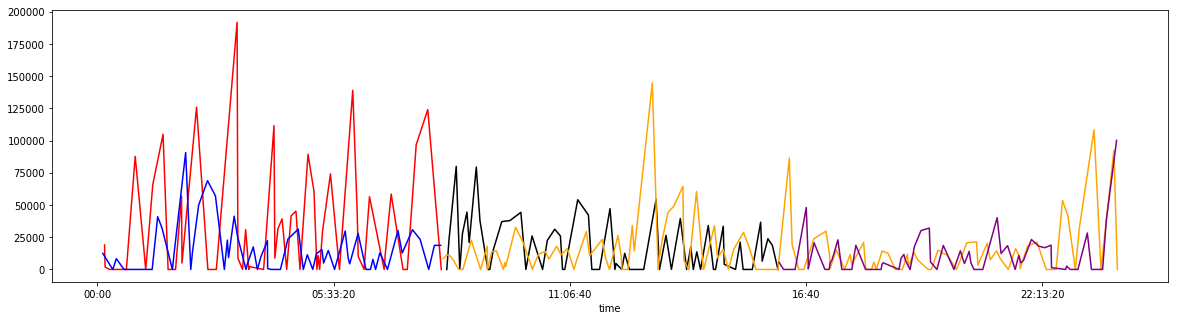

In [254]:
O1_Capacity = data.loc[data['Operator']=="Op_1"]
O2_Capacity = data.loc[data['Operator']=="Op_2"]
O3_Capacity = data.loc[data['Operator']=="Op_3"]
O4_Capacity = data.loc[data['Operator']=="Op_4"]
O5_Capacity = data.loc[data['Operator']=="Op_5"]

fig = plt.figure(figsize=(20, 5))
plt.plot(O1_Capacity.index, O1_Capacity['NumberOfPieces'], color ='red')
plt.plot(O2_Capacity.index, O2_Capacity['NumberOfPieces'], color ='blue')
plt.plot(O3_Capacity.index, O3_Capacity['NumberOfPieces'], color ='black')
plt.plot(O4_Capacity.index, O4_Capacity['NumberOfPieces'], color ='orange')
plt.plot(O5_Capacity.index, O5_Capacity['NumberOfPieces'], color ='purple')
plt.show()

Operator 1 produces the most Parts overall. Operator 1 and 2 Work the first 6 hour shift. Operator 4 works the longest time, 12 hour shift but doesnt produce as many qouantities as Operator 1 who only works 6 hours. Operator 5 is the least productive. 

### • Q4: What is the actual realized production rate, when taking into account all the stoppages?

In [ ]:
##Calculating stopped time